<a href="https://colab.research.google.com/github/felipessrodrigues/machinelearning/blob/aula-04/Alura_MachineLearning_Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [7]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

# trecho de organizacao de codigo
# renomear colunas para padrao conhecido
colunas = {
  'unfinished' : 'pendentes',
  'expected_hours' : 'horas',
  'price' : 'preco'
}

# dicionario para criar uma coluna de visao oposta ao 'Pendentes'
oposto = {
    1 : 0,
    0 : 1
}

dados = dados.rename(columns=colunas)
dados['finalizados'] = dados.pendentes.map(oposto)
dados.tail()

,pendentes,horas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


CÓDIGO DE TREINO

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

x = dados[['horas', 'preco']] # o que seria o X e y?
y = dados['finalizados']

# semente - base para o random
# serve para retirar aleatoriedade do treino e teste
SEED = 5
# as funcoes pegam np.random como padrao/none
np.random.seed(SEED)

# Definindo parametros de treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(
    x , y, test_size = 0.30, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" %
        (len(treino_x), len(teste_x)))

#Criando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia*100))

Treinaremos com 1509 elementos e testaremos com 648 elementos
A acurácia foi de 58.18%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


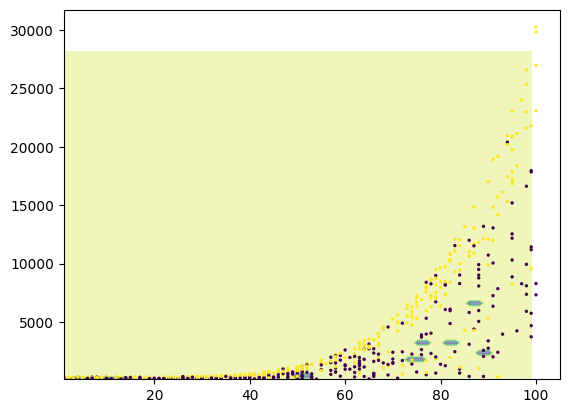

In [11]:
# PLOTAR O RESULTADO
import matplotlib.pyplot as plt

# definição de pixels, quanto mais, melhor
pixels = 100

# separar os pedacos
eixo_x = np.arange(
    treino_x.horas.min(), treino_x.horas.max(),
     (treino_x.horas.max()-treino_x.horas.min()) / pixels)
eixo_y = np.arange(
    treino_x.preco.min(), treino_x.preco.max(),
     (treino_x.preco.max()-treino_x.preco.min()) / pixels)

# apenas dessa forma abaixo repete o eixo, não mesclou
xx, yy = np.meshgrid(eixo_x, eixo_y)
# para mesclar, usar operacao de ravel e concatenate (c_)
pontos = np.c_[xx.ravel(), yy.ravel()] # criou os pares

# pegar o modelo e prever para todos os pontos
Z = modelo.predict(pontos)
# reformatar o modelo conforme matriz
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=2)

O problema no gráfico acima é causado pela escala. O eixo x vai de 0 a 100, enquanto o y vai de 0 a 30.000, desconpensando. Deve reescalar.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

x = dados[['horas', 'preco']] # o que seria o X e y?
y = dados['finalizados']

# semente - base para o random
# serve para retirar aleatoriedade do treino e teste
SEED = 5
# as funcoes pegam np.random como padrao/none
np.random.seed(SEED)

# Definindo parametros de treino e teste
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
    x , y, test_size = 0.30, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" %
        (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x) # treinar o scaler conforme trein_x
treino_x = scaler.transform(raw_treino_x) # transforma o treino
teste_x = scaler.transform(raw_teste_x) # transforma o treino

#Criando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia*100))


Treinaremos com 1509 elementos e testaremos com 648 elementos
A acurácia foi de 67.44%


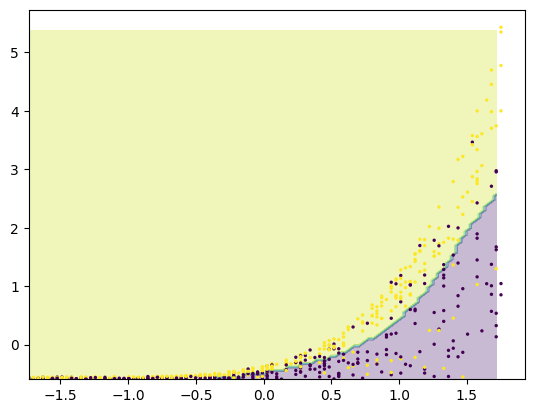

In [13]:
# PLOTAR O RESULTADO
import matplotlib.pyplot as plt

# definição de pixels, quanto mais, melhor
pixels = 100

# antes os treinos eram dataframes do pandas
# neste momento se tem um array de arrays
data_x = teste_x[:,0]
data_y = teste_x[:,1]

eixo_x = np.arange(
    data_x.min(), data_x.max(),
     (data_x.max()-data_x.min()) / pixels)
eixo_y = np.arange(
    data_y.min(), data_y.max(),
     (data_y.max()-data_y.min()) / pixels)

# apenas dessa forma abaixo repete o eixo, não mesclou
xx, yy = np.meshgrid(eixo_x, eixo_y)
# para mesclar, usar operacao de ravel e concatenate (c_)
pontos = np.c_[xx.ravel(), yy.ravel()] # criou os pares

# pegar o modelo e prever para todos os pontos
Z = modelo.predict(pontos)
# reformatar o modelo conforme matriz
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=2)

Agora houve um aprendizado da curva